<a href="https://colab.research.google.com/github/TokyoProgramming/Corona_NLP/blob/main/Corona_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.text.all import *

     |████████████████████████████████| 727kB 7.0MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 1.2MB 10.9MB/s 
     |████████████████████████████████| 204kB 24.6MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 61kB 11.1MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.text.all import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np

from google.colab import drive 
drive.mount('/content/gdrive')

In [5]:
train_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/corona/Corona_NLP_train.csv', 
                       engine='python', encoding = "ISO-8859-1", error_bad_lines=False,
                        usecols = ['OriginalTweet', 'Sentiment'])

In [6]:
train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [ ]:
clean_tweets = []
for tweet in data['OriginalTweet']:
    tweet = re.sub("#[A-Za-z0-9]+","",tweet) #Remove # sign
    ##Here's where all the cleaning takes place
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove @ sign
    tweet =re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'\r\S+', '', tweet)
    clean_tweets.append(tweet)
data['tweet'] = clean_tweets

In [70]:
line = data['tweet'][4].rstrip()

In [71]:
line

"Me, ready to go at supermarket during the  outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The  is a serious thing, but please, don't panic. It causes shortage..."

In [72]:
new_line = line.replace('.', '. ', line.count('.')).replace(',', ', ', line.count(','))

In [73]:
new_line

"Me,  ready to go at supermarket during the  outbreak. \r\r\n\r\r\nNot because I'm paranoid,  but because my food stock is litteraly empty.  The  is a serious thing,  but please,  don't panic.  It causes shortage. . . "

In [77]:
new_line.lstrip()

"Me,  ready to go at supermarket during the  outbreak. \r\r\n\r\r\nNot because I'm paranoid,  but because my food stock is litteraly empty.  The  is a serious thing,  but please,  don't panic.  It causes shortage. . . "

In [78]:
new_line.splitlines()

['Me,  ready to go at supermarket during the  outbreak. ',
 '',
 '',
 '',
 "Not because I'm paranoid,  but because my food stock is litteraly empty.  The  is a serious thing,  but please,  don't panic.  It causes shortage. . . "]

In [79]:
data['tweet'][4].splitlines()

['Me, ready to go at supermarket during the  outbreak.',
 '',
 '',
 '',
 "Not because I'm paranoid, but because my food stock is litteraly empty. The  is a serious thing, but please, don't panic. It causes shortage...",
 '',
 '',
 '',
 '    ']

In [92]:
data['tweet'][4].splitlines()

['Me, ready to go at supermarket during the  outbreak.',
 '',
 '',
 '',
 "Not because I'm paranoid, but because my food stock is litteraly empty. The  is a serious thing, but please, don't panic. It causes shortage...",
 '',
 '',
 '',
 '    ']

In [98]:
s = data['OriginalTweet'][4].splitlines()

In [99]:
s


['Me, ready to go at supermarket during the #COVID19 outbreak.',
 '',
 '',
 '',
 "Not because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...",
 '',
 '',
 '',
 '#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n']

In [220]:


clean_tweets = []
for tweet in train_df['OriginalTweet']:
  tweet = re.sub("#[A-Za-z0-9]+","",tweet) #Remove # sign
  ##Here's where all the cleaning takes place
  tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove @ sign
  tweet =re.sub(r'http\S+', '', tweet)
  tweet = re.sub(r'\r\S+', '', tweet)
  clean_tweets.append(tweet)
train_df['tweet'] = clean_tweets

In [221]:
train_df[:10]

,OriginalTweet,Sentiment,tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,_Gahan and and
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n _19"
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n"
5,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU",Positive,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, _Dodson reports"
6,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive,"Cashier at grocery store was sharing his insights on _19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about""."
7,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral,Was at the supermarket today. Didn't buy toilet paper. \r\r\n\r\r\n _19
8,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i",Positive,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding!"
9,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",Negative,"For corona prevention,we should stop to buy things with the cash and should use online payment metho

In [212]:

def proceedingText(tweet_data):
  total_tweet = []
  for tweet in tweet_data:
  
    new_text = []
    text_len = tweet.splitlines()

    for x in text_len:
      text_len = len(x)
      if(text_len >0):
        new_text.append(x)
        res = ','.join(new_text)
    total_tweet.append(res)
  return total_tweet


In [ ]:
data['tweet']

In [ ]:
len(data['tweet'])
data['tweet'][0]

In [226]:
res = proceedingText(train_df['tweet'])

In [228]:
train_df['new_tweet'] = res

In [229]:
train_df.head()

,OriginalTweet,Sentiment,tweet,new_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,_Gahan and and,_Gahan and and
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak","Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n _19","My food stock is not the only one which is empty...,PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. ,Stay calm, stay safe., _19"
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n","Me, ready to go at supermarket during the outbreak.,Not because I'm paranoid, but because my food stock is litteraly empty. The is a serious thing, but please, don't panic. It causes shortage...,"


In [100]:
','.join(s)

"Me, ready to go at supermarket during the #COVID19 outbreak.,,,,Not because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...,,,,#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n"

In [160]:
import spacy
nlp = spacy.load('en')
sent = "The #Covid changed our life"
doc=nlp(sent)

sub_toks = [tok for tok in doc if (tok.dep_ == "nsubj") ]

print(sub_toks)


[Covid]


In [30]:
train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [7]:
dls = TextDataLoaders.from_df(train_df, text_col='OriginalTweet', label_col='Sentiment', valid_pct=0.20, bs=64, is_lm = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [29]:
dls.show_batch(max_n=2) 

,text,text_
0,xxbos xxmaj it xxunk my heart seeing a xxmaj waitrose worker offer two elderly shoppers a 12 pack of toilet roll that they had stashed out the back for those in xxunk well done @waitrose # waitrose # panicbuyinguk # supermarket # coronavirus xxbos 4 \r\r\n xxmaj truly the country is not designed for a total # lockdown for everyone . xxmaj there are so many people of the lower class that,xxmaj it xxunk my heart seeing a xxmaj waitrose worker offer two elderly shoppers a 12 pack of toilet roll that they had stashed out the back for those in xxunk well done @waitrose # waitrose # panicbuyinguk # supermarket # coronavirus xxbos 4 \r\r\n xxmaj truly the country is not designed for a total # lockdown for everyone . xxmaj there are so many people of the lower class that could
1,"# fightcoronavirus ? @ xxmaj xxunk 's xxmaj plate https : / / t.co / xxunk xxbos xxmaj coronavirus xxmaj latest : xxmaj major xxmaj meat xxmaj processors xxmaj shutting xxmaj down xxmaj plants xxmaj as xxmaj employees xxmaj get xxmaj sick xxmaj with xxup covid-19 https : / / t.co / xxunk \r\r\n\r\r\n "" consumers are unlikely to see any shortages because of production xxunk … . i donât anticipate any","fightcoronavirus ? @ xxmaj xxunk 's xxmaj plate https : / / t.co / xxunk xxbos xxmaj coronavirus xxmaj latest : xxmaj major xxmaj meat xxmaj processors xxmaj shutting xxmaj down xxmaj plants xxmaj as xxmaj employees xxmaj get xxmaj sick xxmaj with xxup covid-19 https : / / t.co / xxunk \r\r\n\r\r\n "" consumers are unlikely to see any shortages because of production xxunk … . i donât anticipate any real"


In [9]:
learn = language_model_learner(
    dls, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

In [10]:
learn.fit_one_cycle(10, 0.02) 

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.115334,3.936154,0.325373,51.221218,01:33
1,3.861157,3.818984,0.332193,45.557888,01:32
2,3.732854,3.800396,0.335702,44.718876,01:32
3,3.594760,3.793757,0.337764,44.423004,01:32
4,3.466658,3.782368,0.340820,43.919918,01:32
5,3.315824,3.771582,0.342715,43.448761,01:32
6,3.202765,3.762189,0.346563,43.042538,01:32
7,3.073185,3.758402,0.348101,42.879864,01:32
8,2.995424,3.759195,0.348916,42.913872,01:32
9,2.942521,3.760769,0.348839,42.981461,01:32


In [13]:
learn.save('language_model_learner')

Path('models/language_model_learner.pth')

In [25]:
data_clas = learn.load('language_model_learner')

In [16]:
TEXT = 'our life style'
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)]
print(preds)

['our life style is changing , like trying to flatten the curve and stay indoors . Hereâ\x92s a great resource for the # coronavirus crisis . Hereâ\x92s what you need to know what you can . To keep your family', 'our life style video : Covid-19 Pandemic Shows How To Catch Up . The video compares to the grocery store and its impact on life , grocery store workers , and others , how to']


In [31]:
train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [35]:
data_clas = TextDataLoaders.from_df(train_df, text_col= 0, label_col= 1, valid_pct=0.20, bs=64)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [37]:
data_clas.show_batch(max_n=5)

,text,category
0,xxbos xxrep 3 ? xxrep 4 ? xxrep 5 ? ? ? xxrep 6 ? xxrep 4 ? xxrep 5 ? ? xxrep 4 ? xxrep 4 ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? xxrep 4 ? ? xxrep 5 ? ? ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? ? ? xxrep 9 ? xxrep 4 ? xxrep 3 ? \r\r\n\r\r\n▁ xxrep 3 ? xxrep 7 ? xxrep 3 ? xxrep 6 ? ? ? xxrep 5 ? xxrep 4 ? xxrep 4 ? ( ? ) ? ? xxrep 5 ? xxrep 4 ? xxrep 4 ? ( ? ? ) ? ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? xxrep 3 ? xxrep 3 ? xxrep 9 ? xxrep 4 ? xxrep 5 ? xxrep 5 ? xxrep 3 ? . https :,Neutral
1,"xxbos xxrep 5 ? : xxrep 4 ? xxrep 6 ? ? xxrep 8 ? \r\r\n . \r\r\n ? ? xxrep 6 ? xxrep 4 ? ? ? 500 xxrep 5 ? xxrep 5 ? ? ? xxrep 5 ? xxrep 7 ? xxrep 4 ? xxrep 7 ? ? ? xxrep 3 ? xxrep 7 ? xxrep 4 ? xxrep 6 ? xxrep 9 ? "" xxrep 6 ? "" xxrep 4 ? xxrep 7 ? xxrep 4 ? xxrep 6 ? xxrep 7 ? xxrep 5 ? xxrep 6 ? xxrep 3 ? xxrep 7 ? ? ? xxrep 5 ? .. \r\r\n▁ # xxrep 3 ? _ xxrep 4 ? _ xxrep 6 ? _ xxrep 4 ? _ xxrep 3 ? https : / / t.co / xxunk",Neutral
2,"xxbos # coronacrisis xxmaj the xxmaj americans queueing for guns , xxmaj the xxmaj dutch for xxmaj cannabis & & xxmaj the xxmaj british for # toiletpaper \r\r\n xxmaj what the xxmaj saudis queueing for ? \r\r\n▁ # xxmaj covid_19 # xxunk # coronavirus # coronaviruspandemic \r\r\n▁ # aramco # xxrep 4 ? _ xxrep 4 ? \r\r\n▁ # xxrep 3 ? _ xxrep 5 ? \r\r\n▁ # xxrep 3 ? _ xxrep 5 ? _ xxrep 4 ? _ xxrep 8 ? \r\r\n▁ # xxrep 4 ? _ ? ? _ xxrep 5 ? _ ? ? _ xxrep 3 ? _ xxrep 7 ? https : / / t.co / xxunk",Neutral
3,xxbos xxup cdc xxup approved ! xxup used xxup in xxup hospitals ! xxup kills xxup viruses ! & & xxmaj we xxmaj have it xxunk \r\r\n https : / / t.co / xxunk \r\r\n xxmaj xxunk xxup xxunk xxup to xxup go ! xxunk - xxunk - xxunk . xxmaj call / xxmaj pay / xxmaj pull xxmaj up & & xxmaj go ! \r\r\n https : / / t.co / xxunk \r\r\n▁ # xxunk # orangecounty # xxunk # xxunk \r\r\n▁ # covid19pandemic # coronavirus # xxunk https : / / t.co / xxunk,Negative
4,"xxbos xxunk xxup very xxup soon xxup the xxup food xxup will xxup be xxup their xxup leverage xxup to xxup control xxup people . xxup hungry xxup people xxup are xxup easy xxup to xxup lead xxup if xxup you xxup promise xxup them xxup food . xxup they xxup are xxup not xxup just xxup killing xxup people xxup with xxup this xxup covid-19 , xxup but xxup the xxup big xxup farmers , xxup processors , xxup and xxup the xxup endless xxup chain xxup of xxup supply xxup and xxup dema",Extremely Positive


In [64]:
learn_text = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3, metrics=accuracy)

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.0005754399462603033)

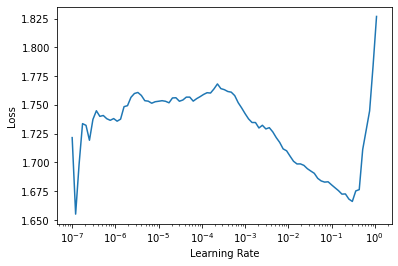

In [65]:
learn_text.lr_find()

In [66]:
learn_text.fit_one_cycle(5, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.455107,1.383557,0.377840,00:26
1,1.449062,1.447835,0.347831,00:26
2,1.422343,1.373597,0.380756,00:26
3,1.388891,1.392678,0.417325,00:26
4,1.377820,1.404075,0.417568,00:26


SuggestedLRs(lr_min=3.311311274956097e-07, lr_steep=9.12010818865383e-07)

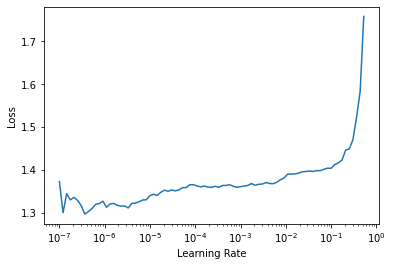

In [67]:
learn_text.freeze_to(-2)
learn_text.lr_find()


In [68]:
learn_text.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.264766,1.217844,0.485968,00:27


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=6.918309736647643e-06)

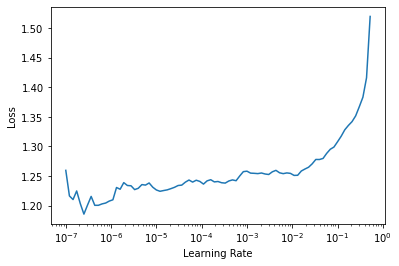

In [70]:
learn_text.freeze_to(-4)
learn_text.lr_find()

SuggestedLRs(lr_min=2.0892961401841602e-06, lr_steep=9.12010818865383e-07)

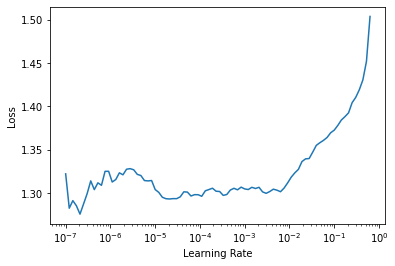

In [55]:
learn_text.freeze_to(-2)
learn_text.lr_find()

In [71]:
learn_text.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.141074,1.508512,0.550358,00:47


SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=6.309573450380412e-07)

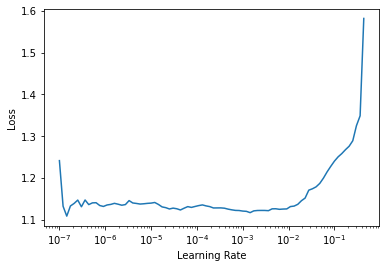

In [72]:
learn_text.lr_find()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.5848931980144698e-06)

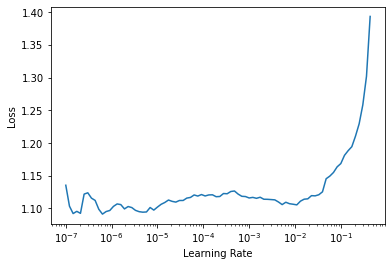

In [73]:
learn_text.freeze_to(-2)
learn_text.lr_find()

In [74]:
learn_text.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.070699,1.448290,0.579395,00:28
1,1.025615,0.996774,0.598469,00:28


SuggestedLRs(lr_min=3.981071586167673e-07, lr_steep=7.585775847473997e-07)

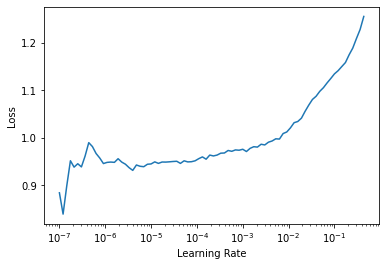

In [75]:
learn_text.unfreeze()
learn_text.lr_find()

In [76]:
learn_text.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.983999,0.976220,0.603936,00:48
1,0.984239,1.003446,0.606245,00:48
2,0.967005,0.973600,0.609039,00:47


In [77]:
learn_text.predict('we need to stay at home')

('Neutral', tensor(3), tensor([0.0037, 0.0068, 0.0343, 0.8733, 0.0819]))

In [79]:
learn_text.predict('our life style has been changed a lot , can not go out as before, I do not like this ')

('Positive', tensor(4), tensor([0.0135, 0.1292, 0.1218, 0.2197, 0.5157]))

In [80]:
learn_text.predict(' I hate covid 19')

('Extremely Negative',
 tensor(0),
 tensor([9.8311e-01, 6.9606e-05, 1.6312e-02, 1.4573e-04, 3.6349e-04]))

In [83]:
learn_text.predict('Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday')

('Positive', tensor(4), tensor([0.0010, 0.3682, 0.0164, 0.0984, 0.5160]))

In [84]:
test_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/corona/Corona_NLP_test.csv', 
                       engine='python', encoding = "ISO-8859-1", error_bad_lines=False,
                        usecols = ['OriginalTweet', 'Sentiment'])

In [87]:
test_df[:20]

,OriginalTweet,Sentiment
0,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative
1,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
2,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral
5,Do you remember the last time you paid $2.99 a gallon for regular gas in Los Angeles?Prices at the pump are going down. A look at how the #coronavirus is impacting prices. 4pm @ABC7 https://t.co/Pyzq8YMuV5,Neutral
6,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive
7,"@DrTedros ""We canÂt stop #COVID19 without protecting #healthworkers.\r\r\nPrices of surgical masks have increased six-fold, N95 respirators have more than trebled &amp; gowns cost twice as much""-@DrTedros #coronavirus",Neutral
8,"HI TWITTER! I am a pharmacist. I sell hand sanitizer for a living! Or I do when any exists. Like masks, it is sold the fuck out everywhere. SHOULD YOU BE WORRIED? No. Use soap. SHOULD YOU VISIT TWENTY PHARMACIES LOOKING FOR THE LAST BOTTLE? No. Pharmacies are full of sick people.",Extremely Negative
9,"Anyone been in a supermarket over the last few days? Went to do my NORMAL shop last night &amp; ??is the sight that greeted me. Barmy! (Btw, whatÂs so special about tinned tomatoes? ????????????). #Covid_19 #Dublin https://t.co/rGsM8xUxr6",Extremely Positive


In [90]:
learn_text.predict('What Precautionary measures have you all taken in your respective Restaurants and Hotels, Comment below...\r\r\n#COVID-19 #Coronavirus\r\r\n\r\r\nCOVID-19: Hotel chains enforce precautionary measures, issue safety, hygiene advisories\r\r\nhttps://t.co/7Zo2vqSPzY')

('Positive', tensor(4), tensor([0.0045, 0.2035, 0.0725, 0.1498, 0.5697]))

In [127]:
test = test_df[:20]
test = test_df
test_tweet = test['OriginalTweet']
test_Sentiment = test['Sentiment']

In [129]:
tweet_res = []
for tweet, res in zip(test_tweet, test_Sentiment):

  test_result = learn_text.predict(tweet)
  tweet_res.append(test_result[0])


test['test_result'] = tweet_res
  






In [126]:
test

,OriginalTweet,Sentiment,test_result
0,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative,Negative
1,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,Positive
2,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive,Extremely Positive
3,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu,Negative,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral,Neutral
5,Do you remember the last time you paid $2.99 a gallon for regular gas in Los Angeles?Prices at the pump are going down. A look at how the #coronavirus is impacting prices. 4pm @ABC7 https://t.co/Pyzq8YMuV5,Neutral,Neutral
6,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive,Positive
7,"@DrTedros ""We canÂt stop #COVID19 without protecting #healthworkers.\r\r\nPrices of surgical masks have increased six-fold, N95 respirators have more than trebled &amp; gowns cost twice as much""-@DrTedros #coronavirus",Neutral,Negative
8,"HI TWITTER! I am a pharmacist. I sell hand sanitizer for a living! Or I do when any exists. Like masks, it is sold the fuck out everywhere. SHOULD YOU BE WORRIED? No. Use soap. SHOULD YOU VISIT TWENTY PHARMACIES LOOKING FOR THE LAST BOTTLE? No. Pharmacies are full of sick people.",Extremely Negative,Extremely Negative
9,"Anyone been in a supermarket over the last few days? Went to do my NORMAL shop last night &amp; ??is the sight that greeted me. Barmy! (Btw, whatÂs so special about tinned tomatoes? ????????????). #Covid_19 #Dublin https://t.co/rGsM8xUxr6",Extremely Positive,Positive


In [132]:
data_res = test.drop(['OriginalTweet'], axis = 1)

In [133]:
data_res 

,Sentiment,test_result
0,Extremely Negative,Negative
1,Positive,Positive
2,Extremely Positive,Extremely Positive
3,Negative,Negative
4,Neutral,Neutral
...,...,...
3793,Positive,Extremely Positive
3794,Negative,Positive
3795,Neutral,Neutral
3796,Extremely Negative,Extremely Negative


In [134]:
confusion_matrix = pd.crosstab(data_res['Sentiment'], data_res['test_result'], rownames=['Actual'], colnames=['Predicted'])


Predicted           Extremely Negative  Extremely Positive  Negative  Neutral  \
Actual                                                                          
Extremely Negative                 305                   0       260        4   
Extremely Positive                   2                 327        43        7   
Negative                           112                  10       626      104   
Neutral                              5                   4        86      445   
Positive                            16                  97       177      104   

Predicted           Positive  
Actual                        
Extremely Negative        23  
Extremely Positive       220  
Negative                 189  
Neutral                   79  
Positive                 553  


In [135]:
confusion_matrix

Predicted,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
Actual,,,,,
Extremely Negative,305,0,260,4,23
Extremely Positive,2,327,43,7,220
Negative,112,10,626,104,189
Neutral,5,4,86,445,79
Positive,16,97,177,104,553


In [141]:
%cd /content/drive/MyDrive/Colab Notebooks/Corona_NLP

/content/drive/MyDrive/Colab Notebooks/Corona_NLP


In [143]:
!git clone https://github.com/TokyoProgramming/Corona_NLP.git

fatal: destination path 'Corona_NLP' already exists and is not an empty directory.


In [144]:
!git config --global user.email "samuraidjango.jp@gmail.com"

In [145]:
!git config --global user.name "TokyoProgramming"

In [146]:
!git add .
!git commit -m 'first commit'

On branch master

Initial commit

nothing to commit


In [153]:
!git remote set-url origin https://github.com/TokyoProgramming/Corona_NLP.git


In [154]:
!git push origin master

error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/TokyoProgramming/Corona_NLP.git'


In [155]:
!git clone https://github.com/TokyoProgramming/Corona_NLP.git


fatal: destination path 'Corona_NLP' already exists and is not an empty directory.
